In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sl

In [16]:
df = pd.read_csv(r"C:\Users\medha\OneDrive\Desktop\cleanednewmed22.csv")

In [ ]:
#1.	What are the total sales over different time periods (quarterly & yearly)?

# Convert the "Order Date" to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%y')

# Extract Year and Quarter from the "Order Date"
df['Year'] = df['Order Date'].dt.year
df['Quarter'] = df['Order Date'].dt.quarter

# Group by Year and Quarter, then sum the Sales
result = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()

# Sort by Year and Quarter
result = result.sort_values(by=['Year', 'Quarter'])

# Display the result
print(result)

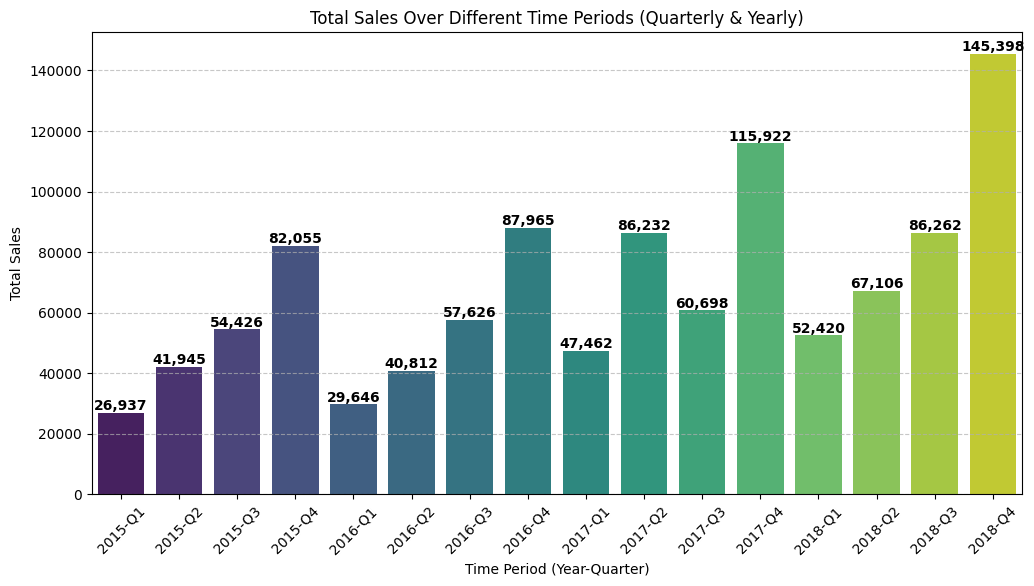

In [36]:
# Convert Order Date to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"])  

# Extract Year and Quarter
df["Year"] = df["Order Date"].dt.year  
df["Quarter"] = df["Order Date"].dt.quarter  

# Group by Year & Quarter, summing the Sales
result = df.groupby(["Year", "Quarter"])["Sales"].sum().reset_index()
result.rename(columns={"Sales": "TotalSales"}, inplace=True)

# Create a new column for time period
result["Time Period"] = result["Year"].astype(str) + "-Q" + result["Quarter"].astype(str)

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Time Period", y="TotalSales", hue="Time Period", data=result, palette="viridis", legend=False)
# Adding data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format numbers
                (p.get_x() + p.get_width() / 2, p.get_height()),  
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Formatting the chart
plt.xticks(rotation=45)
plt.xlabel("Time Period (Year-Quarter)")
plt.ylabel("Total Sales")
plt.title("Total Sales Over Different Time Periods (Quarterly & Yearly)")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

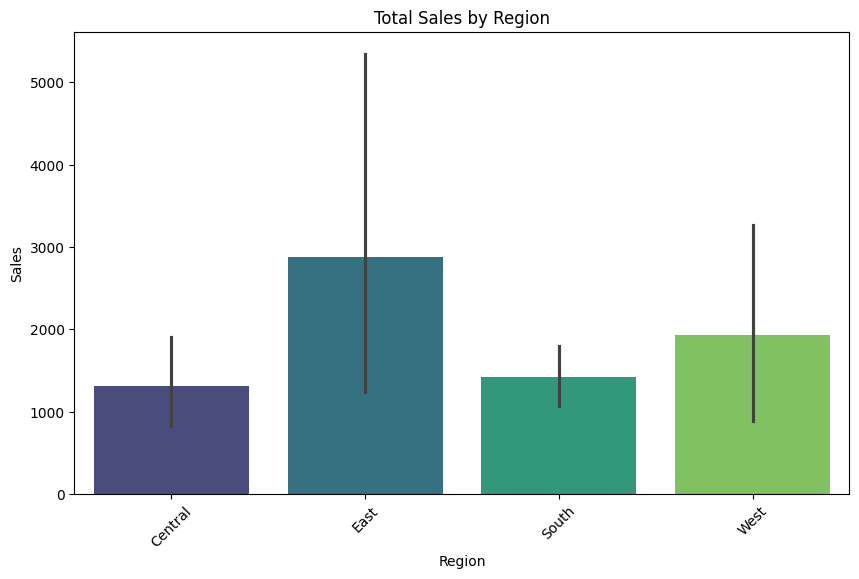

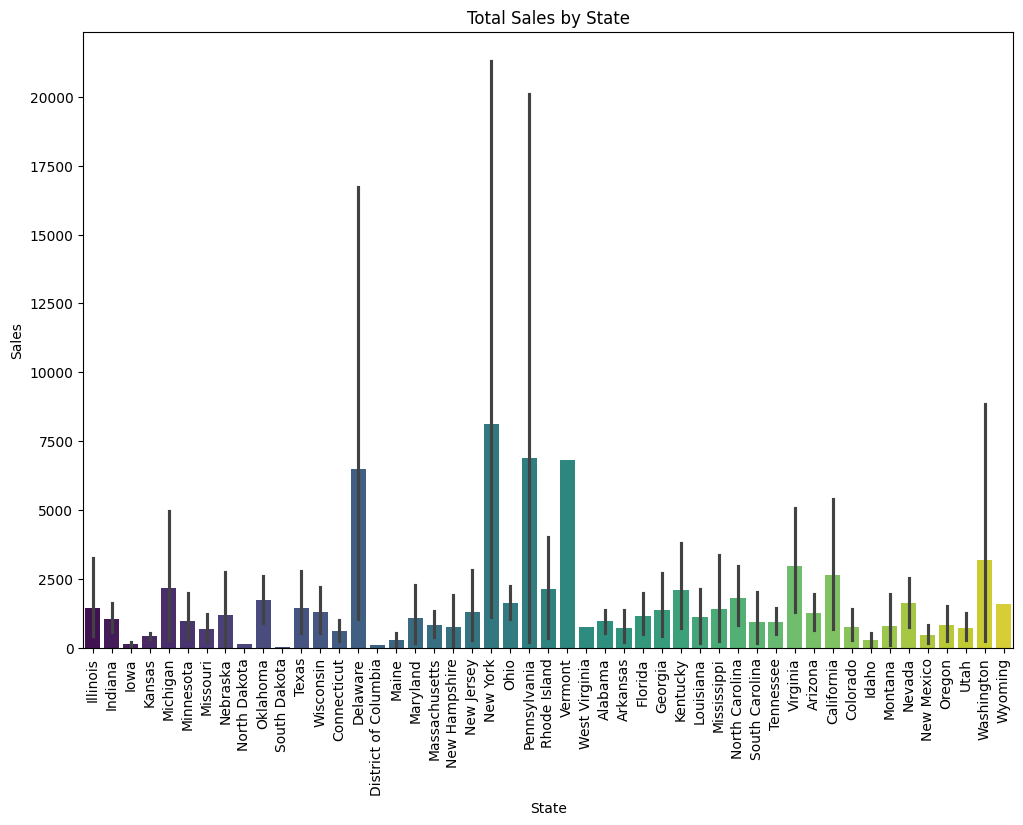

In [39]:
#2.	How do sales vary across different regions, states, and cities?

# Step 1: Group by Region, State, and City to aggregate the sales
df_grouped = df.groupby(['Region', 'State', 'City'])['Sales'].sum().reset_index()

# Step 2: Visualize the sales across regions, states, and cities

# Visualize sales by Region
plt.figure(figsize=(10,6))
sns.barplot(x='Region', y='Sales', data=df_grouped, hue='Region', palette='viridis', legend=False)
plt.title('Total Sales by Region')
plt.xticks(rotation=45)
plt.show()

# Visualize sales by State
plt.figure(figsize=(12,8))
sns.barplot(x='State', y='Sales', data=df_grouped, hue='State', palette='viridis', legend=False)
plt.title('Total Sales by State')
plt.xticks(rotation=90)
plt.show()

# Visualize sales by City
#plt.figure(figsize=(14,8))
#sns.barplot(x='City', y='Sales', data=df_grouped, hue='City', palette='viridis', legend=False)
#plt.title('Total Sales by City')
#plt.xticks(rotation=90)
#plt.show()



In [43]:
# 4.	How does the sales performance differ between different customer segments (Consumer, Corporate, Home Office)?

# Group by the 'Segment' column and calculate the total sales for each segment
sales_by_segment = df.groupby('Segment')['Sales'].sum().reset_index()

# Round the sales values to 2 decimal places for approximation
sales_by_segment['Sales'] = sales_by_segment['Sales'].round(2)

# Sort the sales to easily identify the top-performing and worst-performing segments
sales_by_segment_sorted = sales_by_segment.sort_values(by='Sales', ascending=False)

# Display the result
sales_by_segment_sorted


,Segment,Sales
0,Consumer,552594.51
1,Corporate,333366.29
2,Home Office,196950.02


In [59]:
# 5.	Which shipping mode generates the highest sales revenue?

# Group by the 'ShipMode' column and calculate the total sales for each shipping mode
sales_by_ship_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Round the sales values to 2 decimal places for approximation
sales_by_ship_mode['Sales'] = sales_by_ship_mode['Sales'].round(2)

# Sort the sales to display the shipping modes with their sales
sales_by_ship_mode_sorted = sales_by_ship_mode.sort_values(by='Sales', ascending=False)

# Display the results
sales_by_ship_mode_sorted


,Ship Mode,Sales
3,Standard Class,634727.63
2,Second Class,217739.05
0,First Class,167776.92
1,Same Day,62667.21


In [63]:
#6.	What is the average sales value per customer?
#السؤال دة مختلف اجابته عن الاجابة في الـ SQL

# Group by 'CustomerID' and sum up the sales for each customer
customer_sales = df.groupby('Customer ID')['Sales'].sum()

# Calculate the average sales per customer
average_sales_per_customer = customer_sales.mean()

# Display the result
print(f"The average sales value per customer is: {round(average_sales_per_customer, 2)}")


The average sales value per customer is: 1365.59


In [69]:
#7.	Who are the top Spenders? 

# Group by 'CustomerID' and sum up the sales for each customer
customer_sales = df.groupby('Customer Name')['Sales'].sum().round(2)

# Sort the customers by total sales in descending order
top_spenders = customer_sales.sort_values(ascending=False)

# Display the top spenders (e.g., top 10)
top_10_spenders = top_spenders.head(10)

# Display the result
print("Top 10 Spenders:")
print(top_10_spenders)


Top 10 Spenders:
Customer Name
Adrian Barton         12120.60
Hunter Lopez          11713.83
Tom Ashbrook          11649.21
Sanjit Engle          10639.65
Bill Shonely          10351.02
Christopher Conant     8953.37
Grant Thornton         8174.87
Tom Boeckenhauer       7266.71
Joseph Holt            6695.56
Maria Etezadi          6220.51
Name: Sales, dtype: float64


In [75]:
# 8.	Who are the most loyal customers? Count to CST ID with order ID  

# Count the number of unique orders per customer
loyal_customers = df.groupby('Customer ID')['Order ID'].nunique()

# Merge with customer name information
loyal_customers_info = loyal_customers.reset_index()
loyal_customers_info = loyal_customers_info.merge(df[['Customer ID', 'Customer Name']].drop_duplicates(), on='Customer ID', how='left')

# Sort by the number of orders (loyalty) in descending order
top_loyal_customers = loyal_customers_info.sort_values(by='Order ID', ascending=False)

# Display the most loyal customers (e.g., top 10)
top_10_loyal_customers = top_loyal_customers[[ 'Customer ID','Customer Name', 'Order ID']].head(10)

# Display the result
print("Top 10 Most Loyal Customers:")
print(top_10_loyal_customers)


Top 10 Most Loyal Customers:
    Customer ID        Customer Name  Order ID
275    EP-13915           Emily Phan        17
791    ZC-21910     Zuschuss Carroll        13
147    CK-12205  Chloris Kastensmidt        13
356    JE-15745           Joel Eaton        13
591    PG-18820      Patrick Gardner        13
691    SH-19975        Sally Hughsby        12
653    RP-19390         Resi Pölking        12
694    SJ-20125        Sanjit Jacobs        12
99     BP-11095         Bart Pistole        12
576    NS-18640         Noel Staavos        12


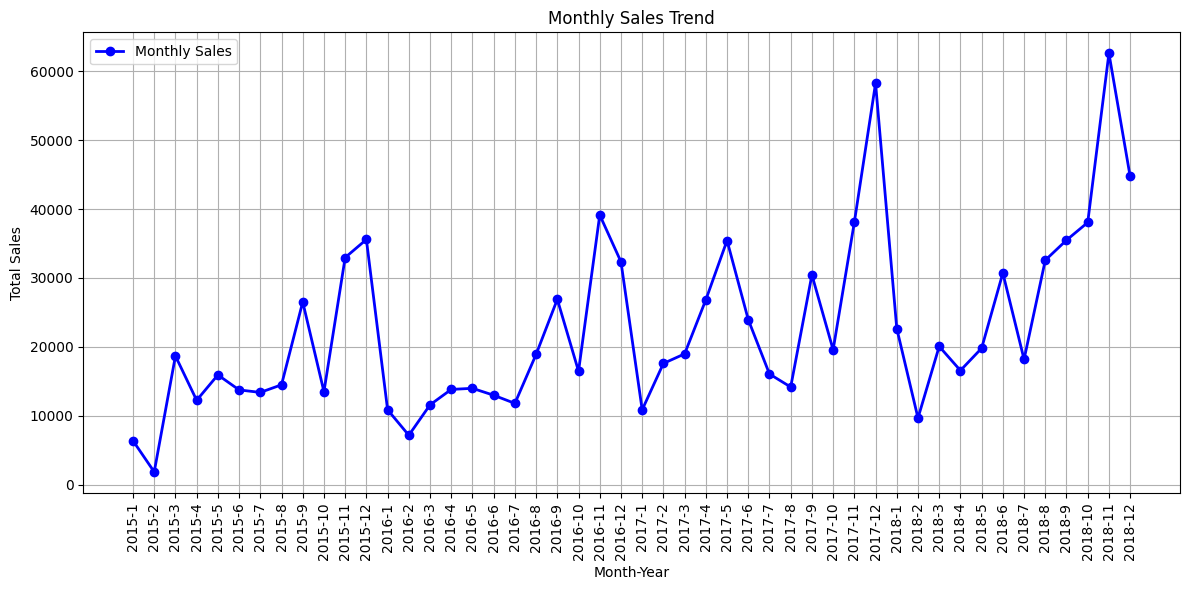

In [82]:
#9.	What are the buying patterns of customers over time? (e.g., seasonal trends)

# Convert 'OrderDate' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract Year and Month from 'OrderDate' for analysis
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group by Year and Month, then aggregate total sales
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()

# Create a new column 'Month-Year' to use as labels
monthly_sales['Month-Year'] = monthly_sales['Year'].astype(str) +  '-' + monthly_sales['Month'].astype(str)

# Create the line chart for Monthly Sales Trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month-Year'], monthly_sales['Sales'], marker='o', color='b', label='Monthly Sales', linestyle='-', linewidth=2)

# Customize the plot
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show grid and legend
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


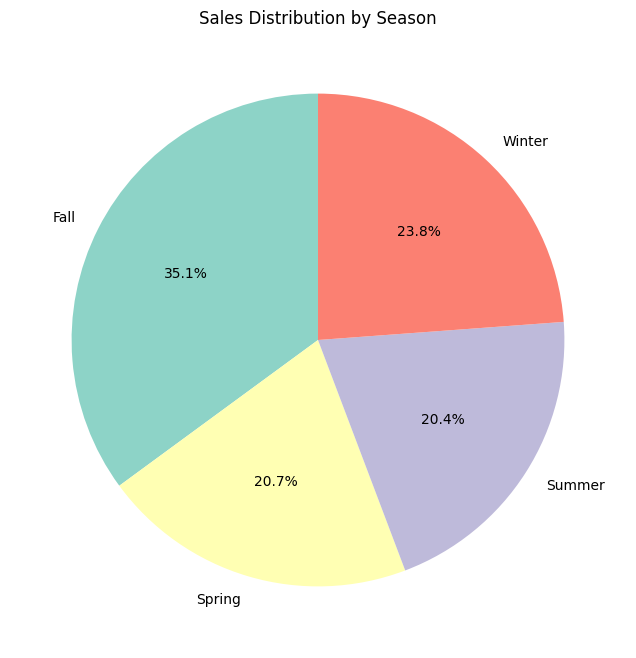

In [84]:
#9.	What are the buying patterns of customers over time? (e.g., seasonal trends)

# Group the data by Year and Season and calculate the total sales for each season across all years
seasonal_sales = df.groupby(['Season'])['Sales'].sum().reset_index()

# Plotting the pie chart
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(seasonal_sales['Sales'], labels=seasonal_sales['Season'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3", len(seasonal_sales)))

# Customize the chart
plt.title('Sales Distribution by Season')

# Show the pie chart
plt.show()


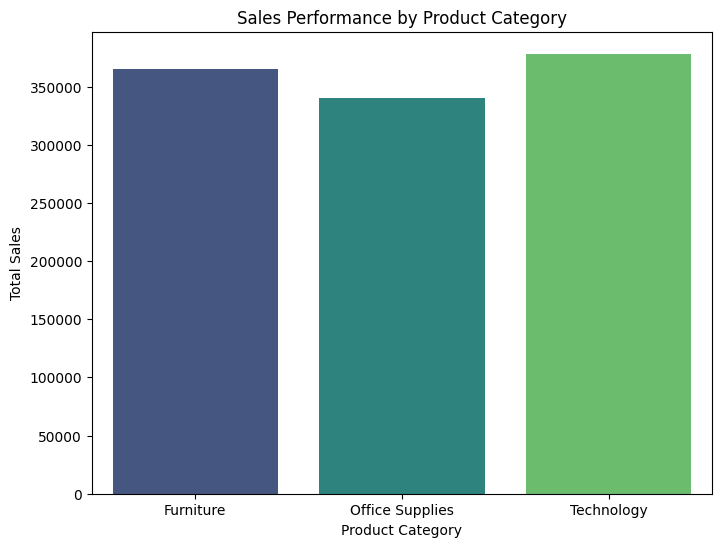

In [87]:
#10.	How does each product category (Furniture, Office Supplies, Technology) perform in terms of sales?

# Group the data by Product Category and calculate the total sales for each category
category_sales = df.groupby(['Category'])['Sales'].sum().reset_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))

# Create a bar plot and assign 'Category' to hue to avoid the warning
sns.barplot(x='Category', y='Sales', data=category_sales, hue='Category', palette='viridis', legend=False)

# Customize the chart
plt.title('Sales Performance by Product Category')
plt.ylabel('Total Sales')
plt.xlabel('Product Category')

# Show the plot
plt.show()


Top 5 Sub-categories with the highest sales:
   Sub-Category       Sales
5        Chairs  162876.832
13       Phones  161994.940
14      Storage  103685.388
3       Binders  103016.134
16       Tables  100529.328

Top 5 Sub-categories with the lowest sales:
   Sub-Category      Sales
8     Fasteners   1600.720
10       Labels   5069.896
7     Envelopes   9040.142
15     Supplies  12924.284
2           Art  14908.672


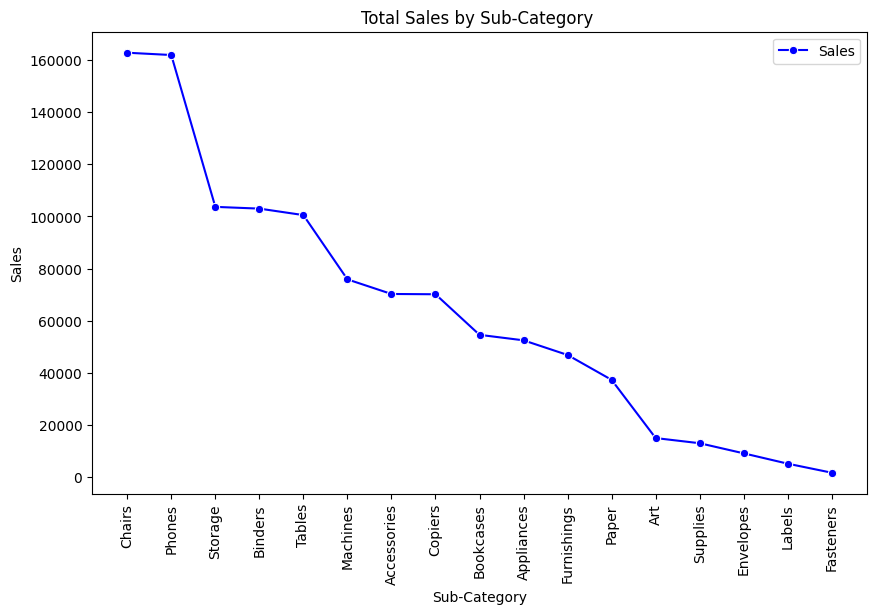

In [94]:
# 11.	Which sub-category has the highest and lowest sales?

# Group the data by Sub-Category and calculate the total sales for each sub-category
sub_category_sales = df.groupby(['Sub-Category'])['Sales'].sum().reset_index()

# Sort sub-categories by sales
sub_category_sales = sub_category_sales.sort_values('Sales', ascending=False)

# Get the top 5 highest sales sub-categories
highest_sales_sub_categories = sub_category_sales.nlargest(5, 'Sales')

# Get the top 5 lowest sales sub-categories
lowest_sales_sub_categories = sub_category_sales.nsmallest(5, 'Sales')

# Display the results
print("Top 5 Sub-categories with the highest sales:")
print(highest_sales_sub_categories)

print("\nTop 5 Sub-categories with the lowest sales:")
print(lowest_sales_sub_categories)

# Plotting the total sales by sub-category with line chart
plt.figure(figsize=(10,6))
sns.lineplot(x='Sub-Category', y='Sales', data=sub_category_sales, marker='o', color='b', label='Sales')

# Highlight the highest and lowest sales sub-categories with different markers
#for index, row in highest_sales_sub_categories.iterrows():
 #   plt.text(row['Sub-Category'], row['Sales'], f'{row["Sub-Category"]} (Highest)', color='g', fontsize=12, ha='center')

#for index, row in lowest_sales_sub_categories.iterrows():
 #   plt.text(row['Sub-Category'], row['Sales'], f'{row["Sub-Category"]} (Lowest)', color='r', fontsize=12, ha='center')

# Add labels and title
plt.title('Total Sales by Sub-Category ')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.show()


Top 5 Products with the Highest Order Count (Highest Demand):
                 Product Name  Order ID
1382          Staple envelope        34
494         Easy-staple paper        24
1388                  Staples        21
244   Avery Non-Stick Binders        13
1389  Staples in misc. colors        10


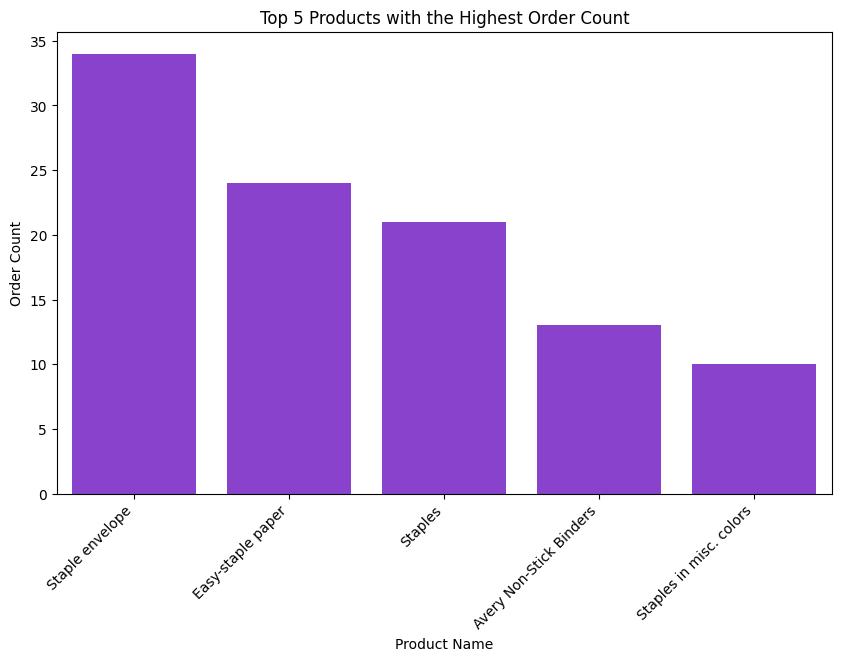

In [112]:
#12.	What Are the products with the highest demand?
# Group the data by Product and calculate the number of orders for each product
product_order_count = df.groupby(['Product Name'])['Order ID'].nunique().reset_index()

# Sort products by order count in descending order
product_order_count_sorted = product_order_count.sort_values('Order ID', ascending=False)

# Display the top 5 products with the highest order count (highest demand)
top_5_products_by_order_count = product_order_count_sorted.head(5)

# Display the result
print("Top 5 Products with the Highest Order Count (Highest Demand):")
print(top_5_products_by_order_count)

# Optionally, plot the results for visualization
plt.figure(figsize=(10,6))

# Barplot to show the top 5 products by order count (vertical bar plot)
sns.barplot(x='Product Name', y='Order ID', data=top_5_products_by_order_count, color='blueviolet')

plt.title('Top 5 Products with the Highest Order Count')
plt.xlabel('Product Name')
plt.ylabel('Order Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


Top 5 States with the Highest Sales:
                   State   Sales
39          South Dakota   74.00
7   District of Columbia  116.18
32          North Dakota  134.42
17                 Maine  548.07
46         West Virginia  755.74

Top 5 States with the Lowest Sales:
           State      Sales
3     California  210349.03
30      New York  145909.31
41         Texas   77193.52
36  Pennsylvania   55239.33
45    Washington   53874.70


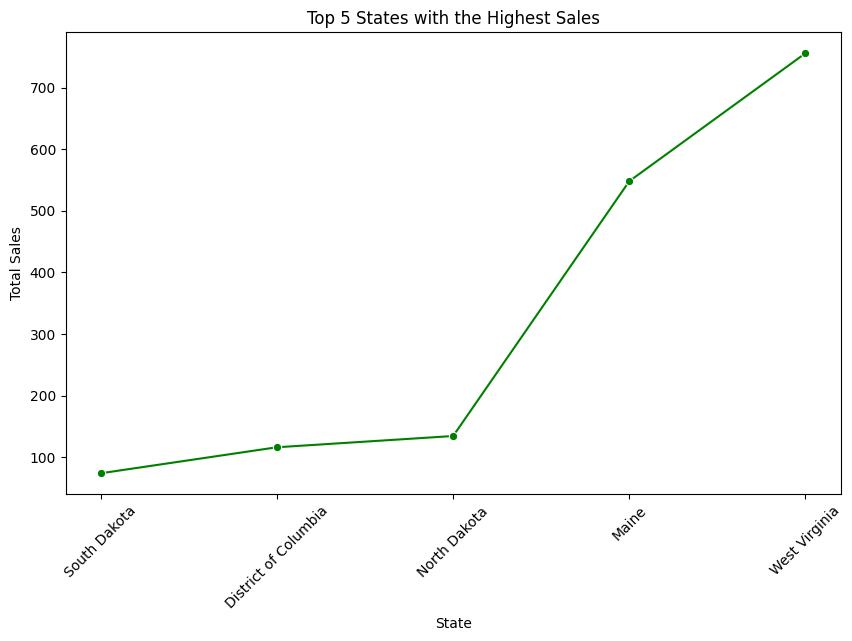

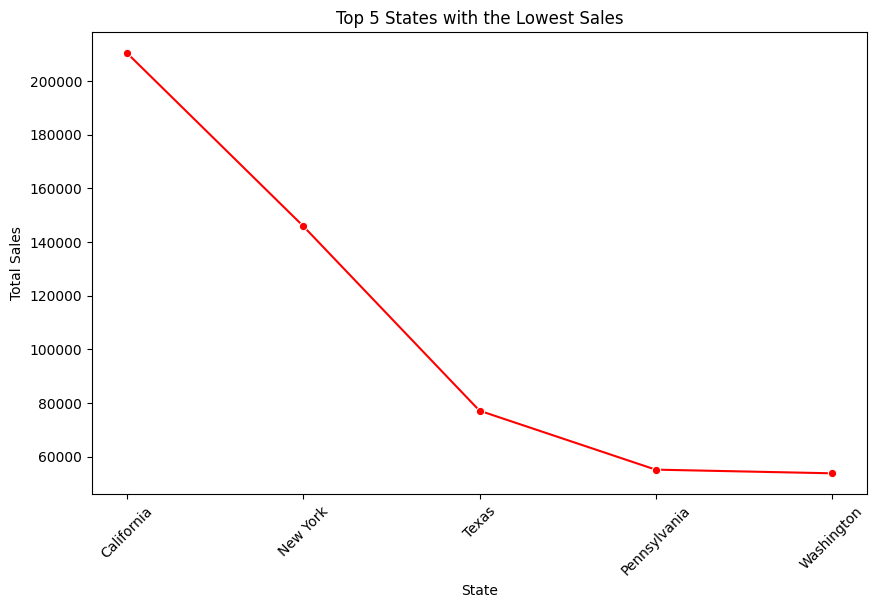

In [120]:
#13.	Which states and cities have the highest and lowest sales?

# Group the data by State and calculate the total sales for each state
state_sales = df.groupby('State')['Sales'].sum().reset_index()

# Sort the data by Sales in descending order to find the highest sales
highest_sales_state = state_sales.sort_values('Sales', ascending=False).head(5).round(2)

# Sort the data by Sales in ascending order to find the lowest sales (ascending order for lowest)
lowest_sales_state = state_sales.sort_values('Sales', ascending=True).head(5).round(2)



# Display the results
print("Top 5 States with the Highest Sales:")
print(highest_sales_state)

print("\nTop 5 States with the Lowest Sales:")
print(lowest_sales_state)

# Line chart for highest sales (sorted in descending order)
plt.figure(figsize=(10, 6))
sns.lineplot(x='State', y='Sales', data=highest_sales_state, marker='o', color='green')
plt.title('Top 5 States with the Highest Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate state names for better readability
plt.show()

# Line chart for lowest sales (sorted in ascending order)
plt.figure(figsize=(10, 6))
sns.lineplot(x='State', y='Sales', data=lowest_sales_state, marker='o', color='red')
plt.title('Top 5 States with the Lowest Sales')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)  # Rotate state names for better readability
plt.show()


Shipping Mode Usage Count:
    Shipping Mode  Count
0  Standard Class   2945
1    Second Class    944
2     First Class    772
3        Same Day    261


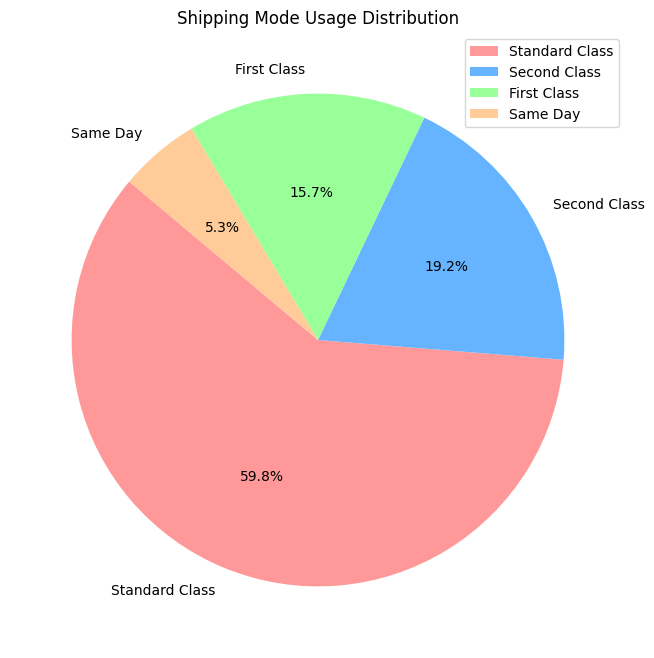

In [129]:
#14.	How many times was each shipping mode used? 

# Group the data by 'Shipping Mode' and count the occurrences of each shipping mode
shipping_mode_count = df['Ship Mode'].value_counts().reset_index()

# Rename the columns for better readability
shipping_mode_count.columns = ['Shipping Mode', 'Count']

# Display the result
print("Shipping Mode Usage Count:")
print(shipping_mode_count)

# Group the data by 'Shipping Mode' and count the occurrences of each shipping mode
shipping_mode_count = df['Ship Mode'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
shipping_mode_count.plot.pie(autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'], startangle=140, legend=True)

# Customize the title
plt.title('Shipping Mode Usage Distribution')

# Show the plot
plt.ylabel('')  # Hide the y-label for a cleaner pie chart
plt.show()


Total Sales by Shipping Mode:
        Ship Mode        Sales
0     First Class  167776.9184
1        Same Day   62667.2120
2    Second Class  217739.0542
3  Standard Class  634727.6341

Total Sales by Month:
    Month        Sales
0       1   50802.7990
1       2   36319.1634
2       3   69342.4408
3       4   69493.7535
4       5   85172.5679
5       6   81427.9295
6       7   59459.3330
7       8   80173.9435
8       9  119377.9163
9      10   87607.6255
10     11  172808.1003
11     12  170925.2460


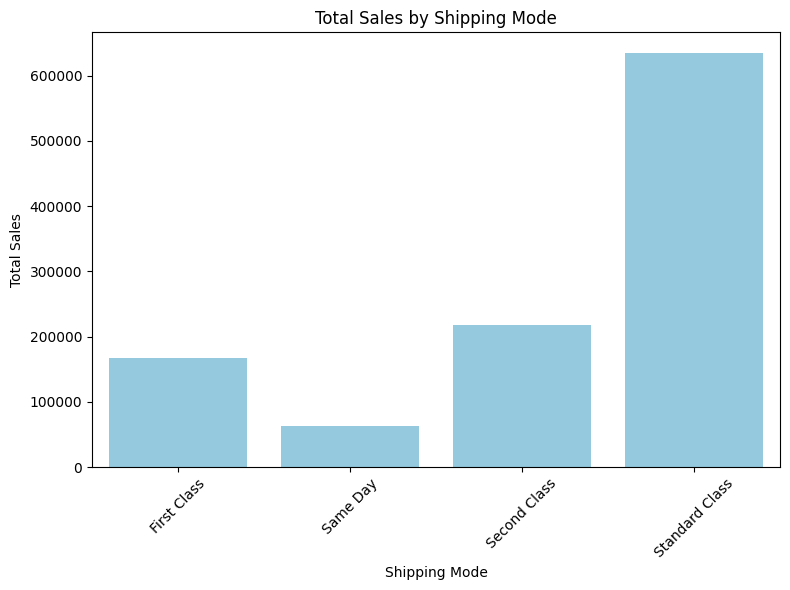

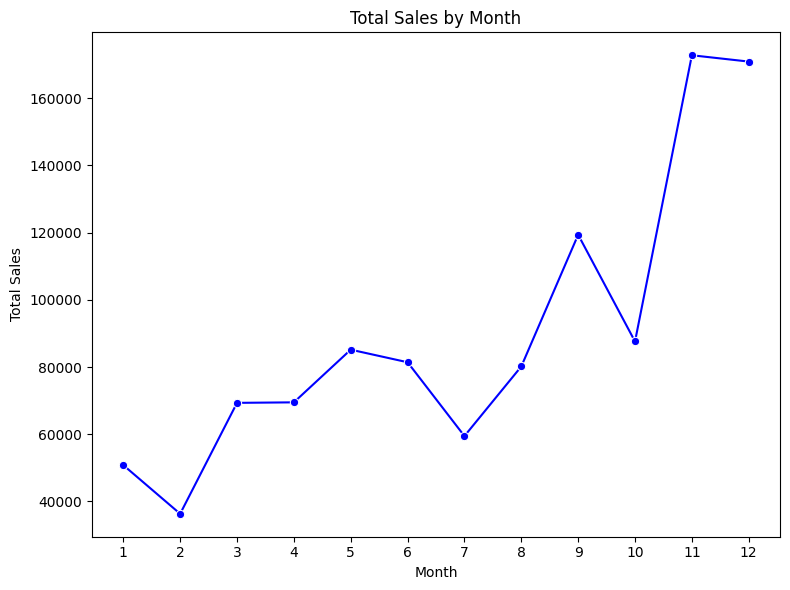

In [147]:
# 16.	How does the shipping mode affect customer purchase behavior? 

# Total Sales by Ship Mode
sales_by_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()

# Total Sales by Month
sales_by_month = df.groupby('Month')[['Sales']].sum().reset_index()

# Display results
print("Total Sales by Shipping Mode:")
print(sales_by_mode)

print("\nTotal Sales by Month:")
print(sales_by_month)


# Bar Plot for Total Sales by Ship Mode (Updated to avoid FutureWarning)
plt.figure(figsize=(8, 6))
sns.barplot(x='Ship Mode', y='Sales', data=sales_by_mode, color='skyblue')
plt.title('Total Sales by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Line Plot for Total Sales by Month
plt.figure(figsize=(8, 6))
sns.lineplot(x='Month', y='Sales', data=sales_by_month, marker='o', color='b')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()

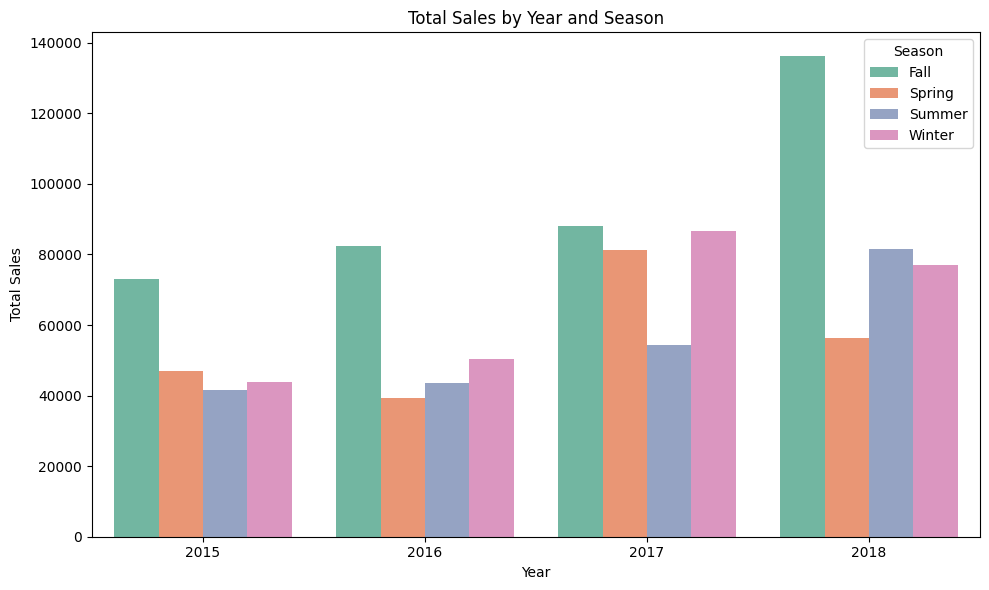

,Year,Season,Sales,SalesType
0,2015,Fall,72996.4070,Highest Sales
1,2015,Spring,46874.7590,Lowest Sales
2,2015,Summer,41657.9220,Lowest Sales
3,2015,Winter,43833.6360,Lowest Sales
4,2016,Fall,82520.2530,Highest Sales
5,2016,Spring,39414.7130,Lowest Sales
6,2016,Summer,43710.5100,Lowest Sales
7,2016,Winter,50403.4140,Lowest Sales
8,2017,Fall,88121.3373,Highest Sales
9,2017,Spring,81261.0590,Lowest Sales


In [154]:
# Group by Year and Season to calculate the total sales
sales_by_season_year = df.groupby(['Year', 'Season'])['Sales'].sum().reset_index()

# Identify Highest and Lowest Sales for each Year
def sales_type(group):
    if group['Sales'].max() == group['Sales'].iloc[0]:
        return 'Highest Sales'
    else:
        return 'Lowest Sales'

# Apply the function to determine SalesType for each group
sales_by_season_year['SalesType'] = sales_by_season_year.groupby('Year')['Sales'].transform(lambda x: ['Highest Sales' if i == x.idxmax() else 'Lowest Sales' for i in x.index])

# Display the result
sales_by_season_year = sales_by_season_year[['Year', 'Season', 'Sales', 'SalesType']]

# Visualization: Bar plot for Total Sales by Year and Season
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Sales', hue='Season', data=sales_by_season_year, palette='Set2')
plt.title('Total Sales by Year and Season')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Season')
plt.tight_layout()
plt.show()

# Stacked bar plot for Sales Contribution by Season for each Year
sales_pivot = sales_by_season_year.pivot_table(values='Sales', index='Year', columns='Season', aggfunc='sum', fill_value=0)

# Plot stacked bar chart
#sales_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
#plt.title('Sales Contribution by Season for Each Year')
#plt.xlabel('Year')
#plt.ylabel('Total Sales')
#plt.tight_layout()
#plt.show()

# Show the result data
sales_by_season_year

   Year      Sales  PreviousYearSales  SalesGrowthRate
0  2015  205362.72                NaN              NaN
1  2016  216048.89          205362.72             5.20
2  2017  310312.96          216048.89            43.63
3  2018  351186.24          310312.96            13.17


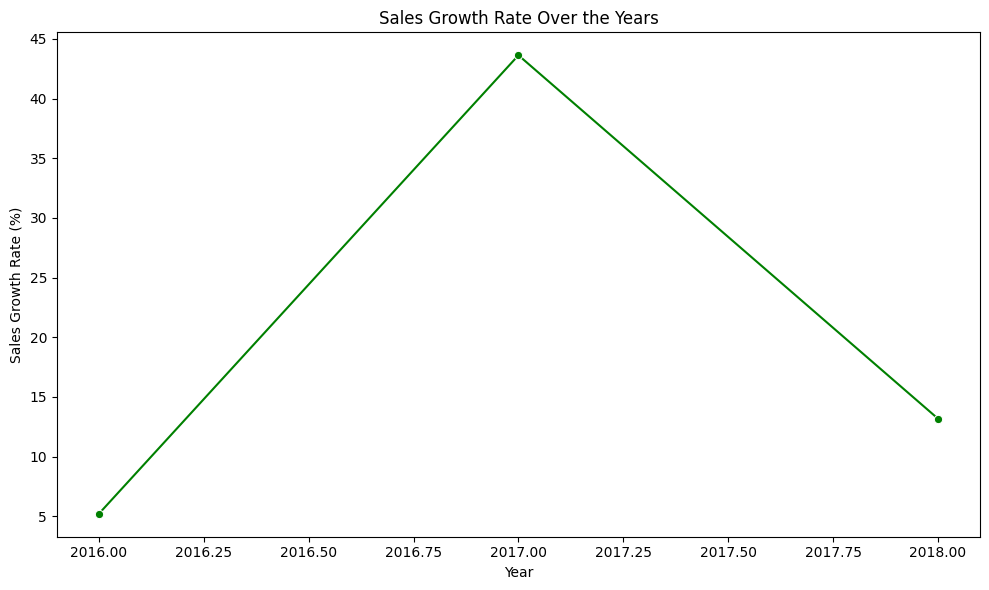

In [159]:
# 18.	How have sales trends evolved over the years?

# Group by Year and calculate total sales per year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Shift sales data to calculate previous year's sales
sales_by_year['PreviousYearSales'] = sales_by_year['Sales'].shift(1)

# Calculate Sales Growth Rate
sales_by_year['SalesGrowthRate'] = ((sales_by_year['Sales'] - sales_by_year['PreviousYearSales']) / sales_by_year['PreviousYearSales']) * 100

# Fill NaN values for the first year (No previous year data) explicitly with None or NaN
sales_by_year.loc[0, 'PreviousYearSales'] = None
sales_by_year.loc[0, 'SalesGrowthRate'] = None

# Round the sales values and growth rate to 2 decimal places
sales_by_year['Sales'] = sales_by_year['Sales'].round(2)
sales_by_year['PreviousYearSales'] = sales_by_year['PreviousYearSales'].round(2)
sales_by_year['SalesGrowthRate'] = sales_by_year['SalesGrowthRate'].round(2)

# Show the result
sales_by_year = sales_by_year[['Year', 'Sales', 'PreviousYearSales', 'SalesGrowthRate']]
print(sales_by_year)

# Visualization: Line plot for Sales Growth Rate

plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='SalesGrowthRate', data=sales_by_year, marker='o', color='green')
plt.title('Sales Growth Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales Growth Rate (%)')
plt.tight_layout()
plt.show()


In [164]:
from sklearn.model_selection import train_test_split


Mean Squared Error: 1610541104.744755
Predicted Sales for 2022: 403661.36


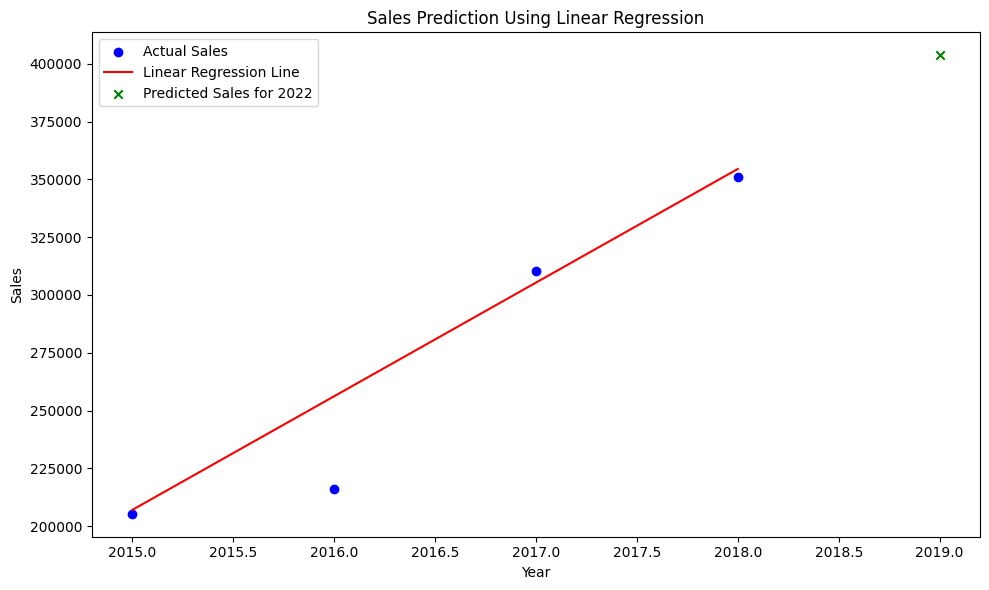

In [174]:
# 19.	Can we predict future sales based on past trends?

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



# Group by Year and calculate total sales per year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Create feature (X) and target (y) variables
X = sales_by_year[['Year']]  # Feature: Year (make sure it's a DataFrame, not a Series)
y = sales_by_year['Sales']   # Target: Sales

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()  # Initialize the model
model.fit(X_train, y_train)  # Train the model

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model performance (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Predict sales for a single future year (e.g., 2022)
single_year = pd.DataFrame([[2019]], columns=['Year'])  # Ensure it's a DataFrame with column name
predicted_sales_single_year = model.predict(single_year)

# Display the predicted sales for the single year
print(f"Predicted Sales for 2022: {predicted_sales_single_year[0]:.2f}")

# Plot the results: Historical Sales vs Predicted Sales
plt.figure(figsize=(10, 6))

# Plot the original data
plt.scatter(X, y, color='blue', label='Actual Sales')

# Plot the regression line
plt.plot(X, model.predict(X), color='red', label='Linear Regression Line')

# Plot the single future prediction (for 2022)
plt.scatter(single_year, predicted_sales_single_year, color='green', label='Predicted Sales for 2022', marker='x')

plt.title('Sales Prediction Using Linear Regression')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()


In [176]:
# 19.	Can we predict future sales based on past trends?

# Group by Year and calculate the total sales per year
sales_by_year = df.groupby('Year')['Sales'].sum().reset_index()

# Rename the columns to match the SQL result
sales_by_year.columns = ['Year', 'TotalSales']
sales_by_year['TotalSales'] = sales_by_year['TotalSales'].round(2)

# Display the result
print(sales_by_year)


   Year  TotalSales
0  2015   205362.72
1  2016   216048.89
2  2017   310312.96
3  2018   351186.24


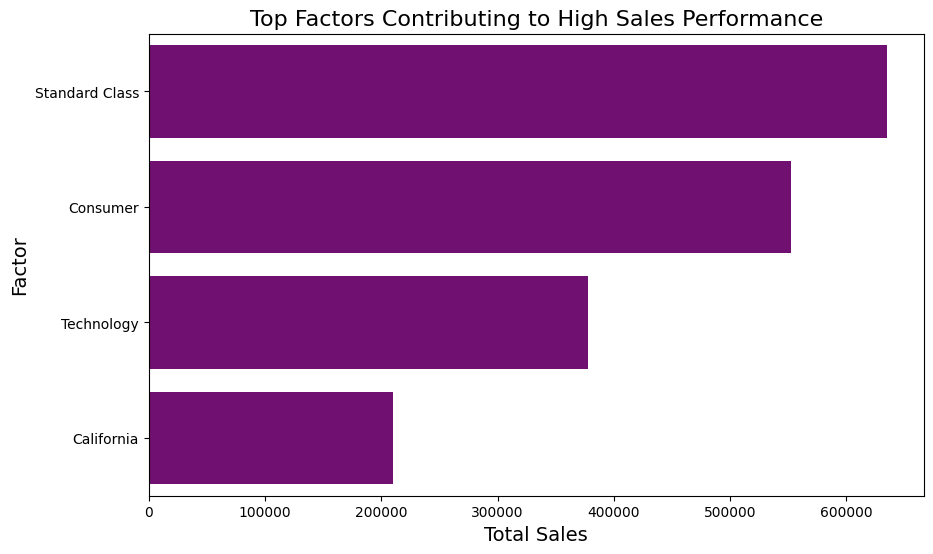

             FactorType          Factor   TotalSales
0     Top Shipping Mode  Standard Class  634727.6341
1  Top Customer Segment        Consumer  552594.5144
2          Top Category      Technology  378204.5820
3             Top State      California  210349.0305


In [196]:
# 20.	Which factors contribute the most to high sales performance?

# Calculate total sales for each factor
top_shipping_mode = df.groupby('Ship Mode')['Sales'].sum().reset_index()
top_customer_segment = df.groupby('Segment')['Sales'].sum().reset_index()
top_category = df.groupby('Category')['Sales'].sum().reset_index()
top_state = df.groupby('State')['Sales'].sum().reset_index()

# Sort values to get the top factors based on sales
top_shipping_mode = top_shipping_mode.sort_values('Sales', ascending=False).head(1)
top_customer_segment = top_customer_segment.sort_values('Sales', ascending=False).head(1)
top_category = top_category.sort_values('Sales', ascending=False).head(1)
top_state = top_state.sort_values('Sales', ascending=False).head(1)

# Combine the results into a single DataFrame
factor_data = pd.DataFrame({
    'FactorType': ['Top Shipping Mode', 'Top Customer Segment', 'Top Category', 'Top State'],
    'Factor': [
        top_shipping_mode['Ship Mode'].values[0],
        top_customer_segment['Segment'].values[0],
        top_category['Category'].values[0],
        top_state['State'].values[0]
    ],
    'TotalSales': [
        top_shipping_mode['Sales'].values[0],
        top_customer_segment['Sales'].values[0],
        top_category['Sales'].values[0],
        top_state['Sales'].values[0]
    ]
})

# Plotting the results
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='Factor', data=factor_data, color='purple')  # Directly set the color

# Adding title and labels
plt.title('Top Factors Contributing to High Sales Performance', fontsize=16)
plt.xlabel('Total Sales', fontsize=14)
plt.ylabel('Factor', fontsize=14)

# Display the plot
plt.show()

# Display the results
print(factor_data)
